A gambler starts with wealth k dollars and has a target n > k. At each step t he chooses a
stake bt uniformly at random from {1, 2}, subject to affordability (bt ≤ his current wealth).

If
he bets 1 dollar ,  he wins with probability p1 and if he bets 2 dollars he wins with probability p2.

• On a win, his wealth increases by bt, i.e., Wt+1 = min (Wt + bt, n)

• On a loss, his wealth decreases by bt, i.e., Wt+1 = max (Wt − bt, 0)


For a given (k, n, p1, p2)-tuple, simulate sample paths till win/ruin and estimate win probability
using Monte Carlo simulation over 10000 trials. Also, plot the value of the stopping time for 100
of the win iterations and 100 iterations in which the gambler is ruined.


Default value of (k, n, p1, p2) = (40, 60, 0.6, 0.4)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time


In [7]:
def gambler_ruin_multiple_stake_uniform_betting(k,n,p1,p2,rng = np.random.default_rng(seed=42)):
  wealth = k
  steps = 0
  path = [wealth]

  while 0 < wealth and wealth < n:
    # choose stake uniformly from {1,2} respecting affordability
    possible_bets = [b for b in [1,2] if b <= wealth]
    bet = np.random.choice(possible_bets)

    if bet == 1:
      if rng.random() < p1:
        wealth = min(wealth+1,n)
      else:
        wealth = max(wealth-1,0)

    else:
      if rng.random() < p2:
        wealth = min(wealth+2,n)
      else:
        wealth = max(wealth-2,0)

    steps += 1
    path.append(wealth)

  return steps ,wealth , path

In [8]:
# initialize all parameters

start_k = 40
target_n = 60
p1 = 0.6
p2 = 0.4
rng = np.random.default_rng(seed=42)
num_monte_carlo_trails = 10000

steps , final_wealth , path = gambler_ruin_multiple_stake_uniform_betting(start_k,target_n,p1,p2,rng)


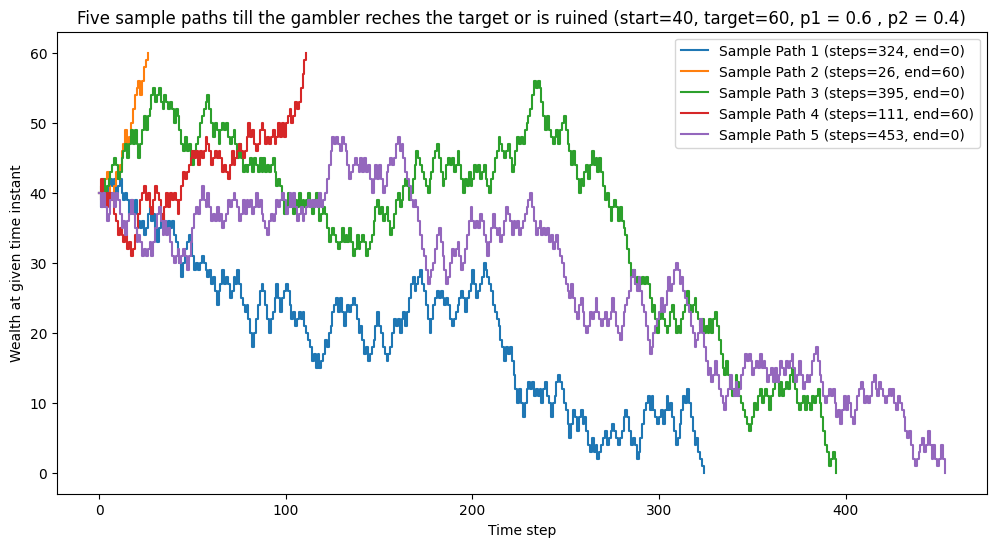

In [9]:
# Plot first 5 sample paths till the gambler reaches the target or is ruined

sample_paths = []
for i in range(5):
  steps , final_wealth , path = gambler_ruin_multiple_stake_uniform_betting(start_k,target_n,p1,p2,rng)
  sample_paths.append((path , steps , final_wealth))

plt.figure(figsize=(12,6))

for i , (path , steps , final_wealth) in enumerate(sample_paths,start=1):
  plt.step(range(len(path)),path,where='post',label=f'Sample Path {i} (steps={steps}, end={final_wealth})')

plt.xlabel('Time step')
plt.ylabel('Wealth at given time instant')
plt.title(f'Five sample paths till the gambler reches the target or is ruined (start={start_k}, target={target_n}, p1 = {p1} , p2 = {p2})')
plt.legend()
plt.grid(False)
plt.show()

In [10]:
# Monte Carlo simulation to estimate the probability that the gambler wins

stop_times = np.empty(num_monte_carlo_trails,dtype=np.int64)
final_wealths = np.empty(num_monte_carlo_trails,dtype=np.int64)

t0 = time.time()
for i in range(num_monte_carlo_trails):
  t , final_x , _ = gambler_ruin_multiple_stake_uniform_betting(start_k,target_n,p1,p2,rng)
  stop_times[i] = t
  final_wealths[i] = final_x

t1 = time.time()

# estimate win probability

wins_mask = (final_wealths == target_n)
num_wins = wins_mask.sum()
p_hat = num_wins/num_monte_carlo_trails

print(f"Monte Carlo estimate (10^4 trials): P(win) ≈ {p_hat:.4f}")
print(f"Time taken: {t1 - t0:.2f}s")



Monte Carlo estimate (10^4 trials): P(win) ≈ 0.1887
Time taken: 38.42s


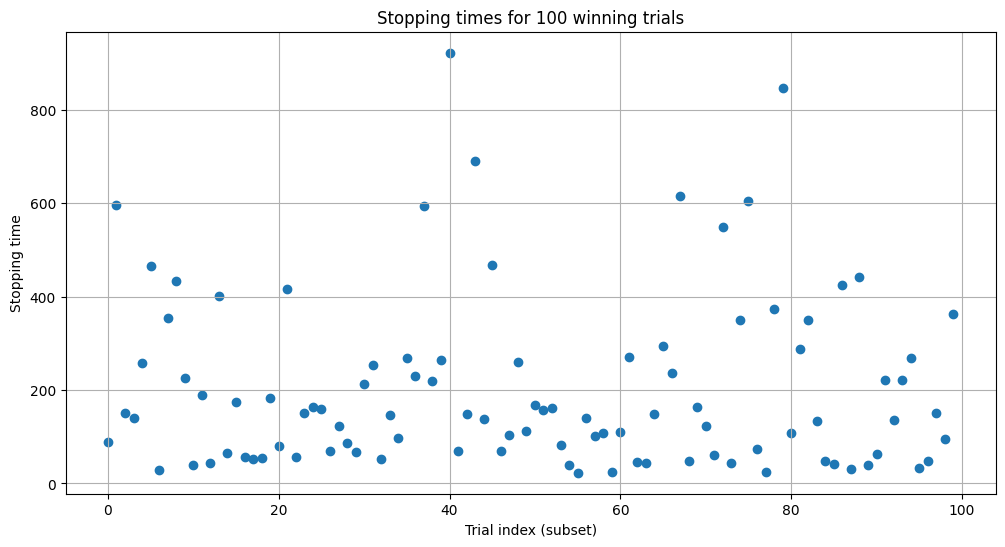

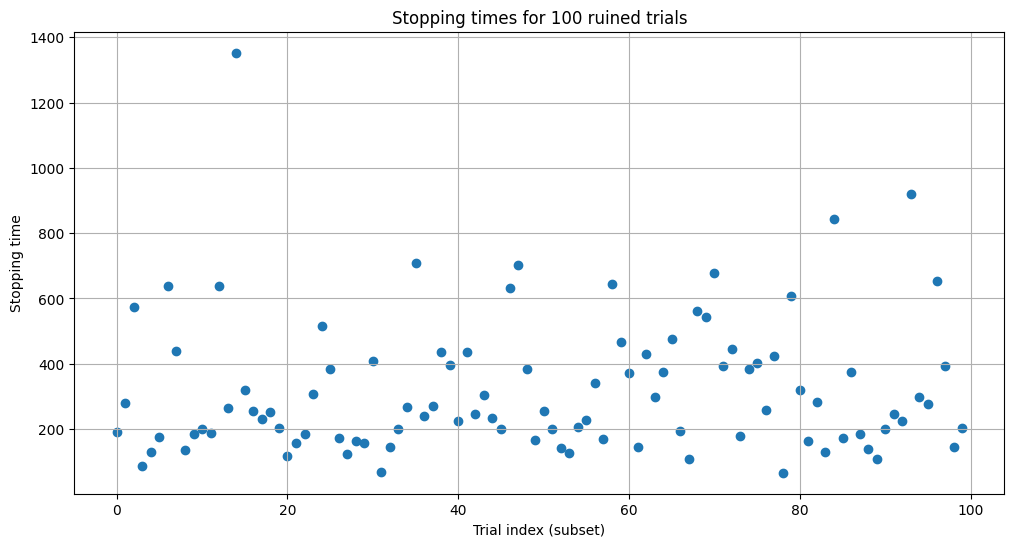

In [11]:
# Plot stopping times for 100 winning and 100 ruined trails

rng2 = np.random.default_rng(seed=123)

win_indices = np.where(wins_mask)[0]
loss_indices = np.where(~wins_mask)[0]

# pick upto 100 from each

chosen_wins = rng2.choice(win_indices,size=min(100,len(win_indices)),replace=False)
chosen_losses = rng2.choice(loss_indices,size=min(100,len(loss_indices)),replace=False)

# plot stopping time for wins

plt.figure(figsize=(12,6))
plt.scatter(np.arange(len(chosen_wins)) , stop_times[chosen_wins])
plt.xlabel('Trial index (subset)')
plt.ylabel('Stopping time')
plt.title('Stopping times for 100 winning trials')
plt.grid(True)
plt.show()


# plot stopping times for 100 ruins

plt.figure(figsize=(12,6))
plt.scatter(np.arange(len(chosen_losses)) , stop_times[chosen_losses])
plt.xlabel('Trial index (subset)')
plt.ylabel('Stopping time')
plt.title('Stopping times for 100 ruined trials')
plt.grid(True)
plt.show()


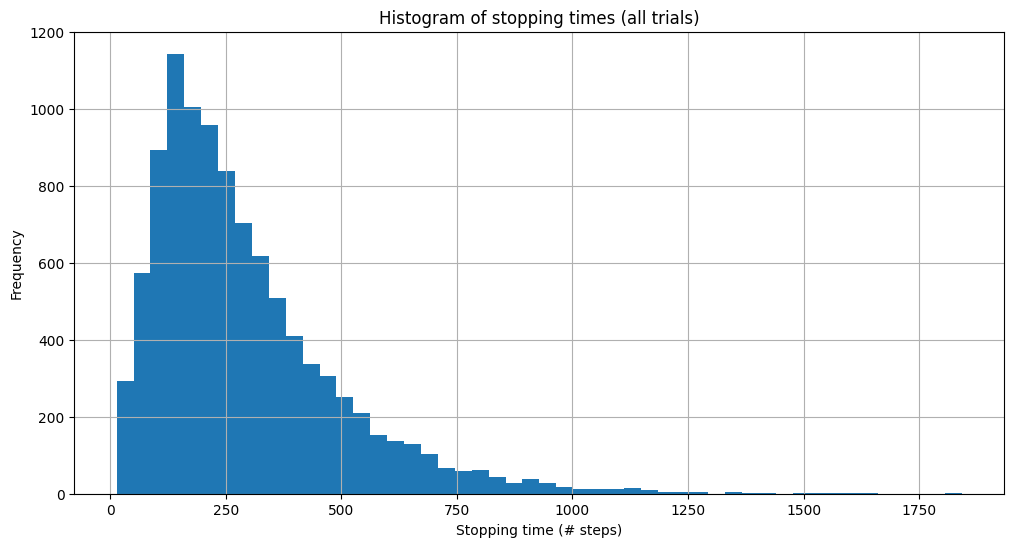

In [13]:
# histogram of stopping times

plt.figure(figsize=(12,6))
plt.hist(stop_times,bins=50)
plt.xlabel('Stopping time (# steps)')
plt.ylabel('Frequency')
plt.title('Histogram of stopping times (all trials)')
plt.grid(True)
plt.show()